In [9]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import pandas as pd
import sys
sys.path.append('../')
from dataflow import Flow

version = '6.0.4'
my_flow = Flow(None, None, None, csv_path=f'../data_files/{version}.csv')
all_data = my_flow.get_combined_data()
(X_train, y_train), (X_val, y_val), (X_test, y_test) = my_flow.get_train_val_test_split()
clf = RandomForestClassifier(n_estimators=500, max_depth=12, random_state=0)

In [10]:
clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=12, n_estimators=500, random_state=0)

In [11]:
from joblib import dump, load
dump(clf, 'models/CLF_6.0.4.joblib')  
#clf = load('models/CLF_6.0.4.joblib')                  

['models/CLF_6.0.4.joblib']

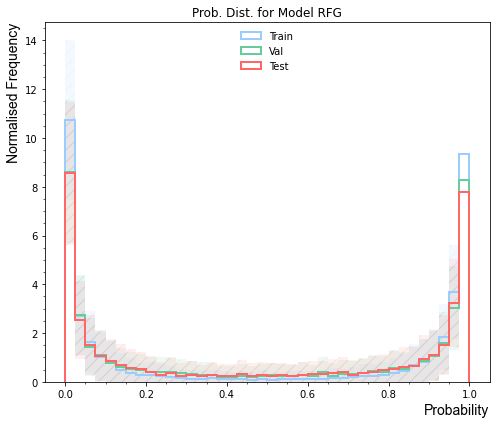

In [12]:
import plotter as ptr

train = X_train.copy()
train['category'] = y_train

val = X_val.copy()
val['category'] = y_val

test = X_test.copy()
test['category'] = y_test

myPlot = ptr.ProbabilityDistribution(train, val, test)
myPlot.plot_multiple(clf, 'RFG')